Домашние задание 1.


In [1]:
import cv2

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
img = cv2.imread('lena.png')

In [4]:
img=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
img=cv2.cvtColor(img,cv2.COLOR_HSV2RGB)

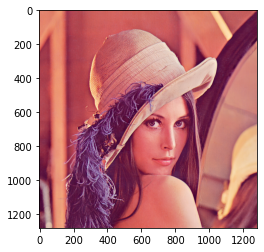

In [5]:
plt.imshow(img)

In [6]:
face_cascade = cv2.CascadeClassifier("./haarcascade_frontalface_default.xml")

In [7]:
face=face_cascade.detectMultiScale(img)

In [8]:
print(face)

[[539 505 436 436]]


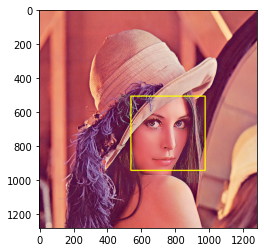

In [26]:
find=cv2.rectangle(img,(face[0][0],face[0][1]),(face[0][0]+face[0][2],face[0][1]+face[0][3]),(255,255,0),5)
plt.imshow(find)

2

In [10]:
img = cv2.imread('lena.png')
img=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
img=cv2.cvtColor(img,cv2.COLOR_HSV2RGB)

In [11]:
xx=int(face[0][2]*0.1)
yy=int(face[0][3]*0.1)
crop_img= img[face[0][0]-xx:face[0][0]+face[0][2]+xx,face[0][1]-yy:face[0][1]+face[0][3]+yy]


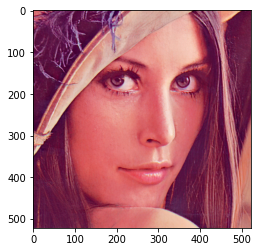

In [12]:
plt.imshow(crop_img)

3

In [13]:
edges = cv2.Canny(crop_img,80,100)

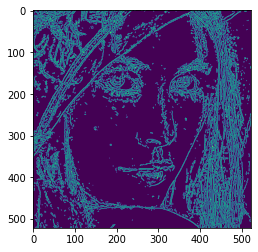

In [14]:
plt.imshow(edges)

4

In [15]:
contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
edges.fill(0)
list=[]
for cont in contours :
    minRect= cv2.minAreaRect(cont)
    if ((minRect[1][0]>=10) or (minRect[1][1]>=10)) :
        list.append(cont)
new_contours=tuple(list)

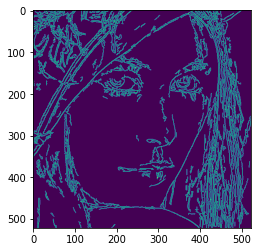

In [16]:
cv2.drawContours(edges,new_contours,-1,(255,255,255),1)
plt.imshow(edges)

5

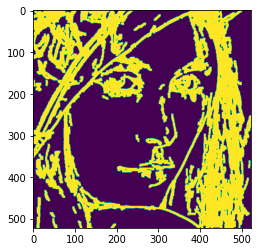

In [17]:
kernel=np.ones((5,5),np.uint8)
dilate_img=cv2.dilate(edges,kernel)
plt.imshow(dilate_img)

6

[[ 0 16 80 ...  0  0  0]
 [ 0 16 80 ...  0  0  0]
 [ 0 16 80 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


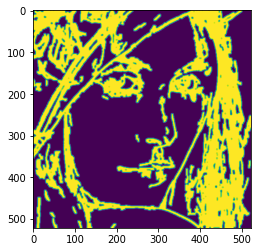

In [25]:
blur_im=cv2.GaussianBlur(dilate_img, ksize=(5, 5),sigmaX=0, sigmaY=0)
print(blur_im)
plt.imshow(blur_im)

In [19]:
M =cv2.normalize(blur_im,None,alpha=0.0, beta=1.0, norm_type=cv2.NORM_MINMAX,dtype=cv2.CV_32F)
print(M)

[[0.        0.0627451 0.3137255 ... 0.        0.        0.       ]
 [0.        0.0627451 0.3137255 ... 0.        0.        0.       ]
 [0.        0.0627451 0.3137255 ... 0.        0.        0.       ]
 ...
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]]


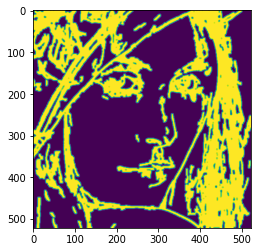

In [20]:
plt.imshow(M)

7

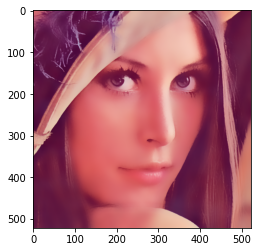

In [21]:
F1 = cv2.bilateralFilter(crop_img, 25, 100, 100)
plt.imshow(F1)

8

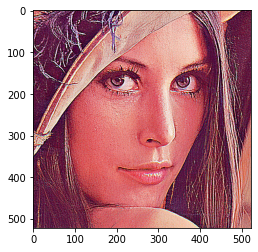

In [22]:
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
F2 = cv2.filter2D(crop_img, -1, kernel)
plt.imshow(F2)

9

In [23]:
Result=crop_img
for x in range(crop_img.shape[0]) :
    for y in range(crop_img.shape[1]) :
        Result[x,y]=M[x,y]*F2[x,y]+(1-M[x,y])*F1[x,y]

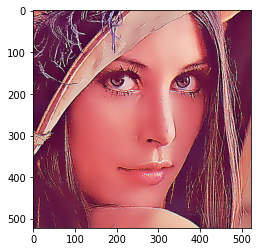

In [24]:
plt.imshow(Result)